In [16]:
from EventClass import Event
import numpy as np
import matplotlib.pyplot as plt

copper_mountain = Event(    
    lat_min=39.3,
    lat_max=39.7,
    lon_min=-106.2,
    lon_max=-106.1,
    start_date="1998-01-01",
    end_date="2022-12-31",
)

data = copper_mountain.get_data()
lats = copper_mountain.get_lats()
lons = copper_mountain.get_lons()
dates = copper_mountain.get_dates()

print("Dates:", len(copper_mountain.get_dates()))
print("Lat shape:", copper_mountain.get_lats().shape)
print("Lon shape:", copper_mountain.get_lons().shape)

Processing file: ./data\cmorph/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_19980101.nc
Processing file: ./data\cmorph/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_19980102.nc
Processing file: ./data\cmorph/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_19980103.nc
Processing file: ./data\cmorph/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_19980104.nc
Processing file: ./data\cmorph/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_19980105.nc
Processing file: ./data\cmorph/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_19980106.nc
Processing file: ./data\cmorph/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_19980107.nc
Processing file: ./data\cmorph/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_19980108.nc
Processing file: ./data\cmorph/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_19980109.nc
Processing file: ./data\cmorph/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_19980110.nc
Processing file: ./data\cmorph/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_19980111.nc
Processing file: ./data\cmorph/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_19980112.nc
Processing file: ./data\cmorph/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_19980113.nc
Processing file: ./data\c

C:\Users\CBetch\AppData\Local\Temp\ipykernel_32280\4195657886.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "precip": df["precip"].resample("M").sum(),       # total mm/month
C:\Users\CBetch\AppData\Local\Temp\ipykernel_32280\4195657886.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "humidity": df["humidity"].resample("M").mean(),  # monthly avg
C:\Users\CBetch\AppData\Local\Temp\ipykernel_32280\4195657886.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "temp": df["temp"].resample("M").mean()           # monthly avg


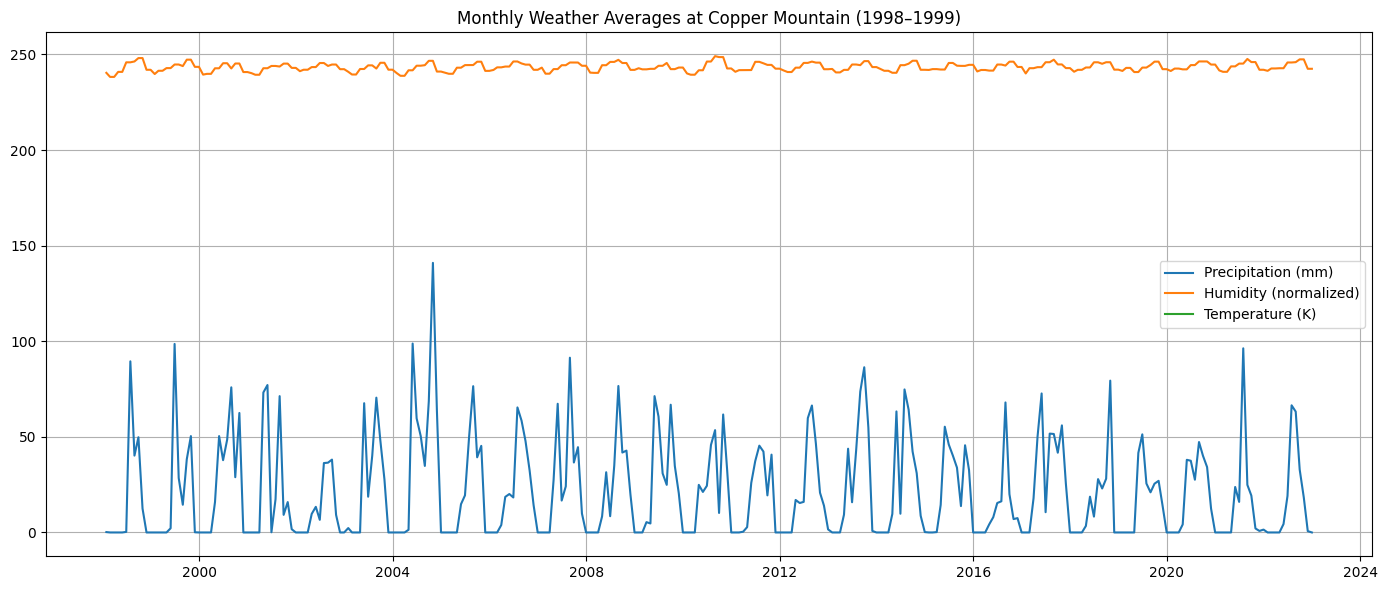

In [ ]:
import pandas as pd

# Find closest lat/lon index
i = np.argmin(np.abs(lats - 39.4790))
j = np.argmin(np.abs(lons - (360 - 106.1613)))  # convert to 0–360

# Extract time series
precip = [data[t][i][j][0] for t in range(len(dates))]
humidity = [data[t][i][j][1] for t in range(len(dates))]
temp = [data[t][i][j][2] for t in range(len(dates))]

# Build a DataFrame
df = pd.DataFrame({
    "date": pd.to_datetime(dates),
    "precip": precip,
    "humidity": humidity,
    "temp": temp
})

# Set date as index
df.set_index("date", inplace=True)

# Resample monthly and compute mean
monthly = pd.DataFrame({
    "precip": df["precip"].resample("M").sum(),       # total mm/month
    "humidity": df["humidity"].resample("M").mean(),  # monthly avg
    "temp": df["temp"].resample("M").mean()           # monthly avg
})

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(monthly.index, monthly["precip"], label="Precipitation (mm)")
plt.plot(monthly.index, monthly["humidity"], label="Humidity (normalized)")
plt.plot(monthly.index, monthly["temp"], label="Temperature (K)")
plt.title("Monthly Weather Averages at Copper Mountain (1998–1999)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# Export the humidity by date
df[["humidity"]].to_csv("humidity_data.csv", index=True)

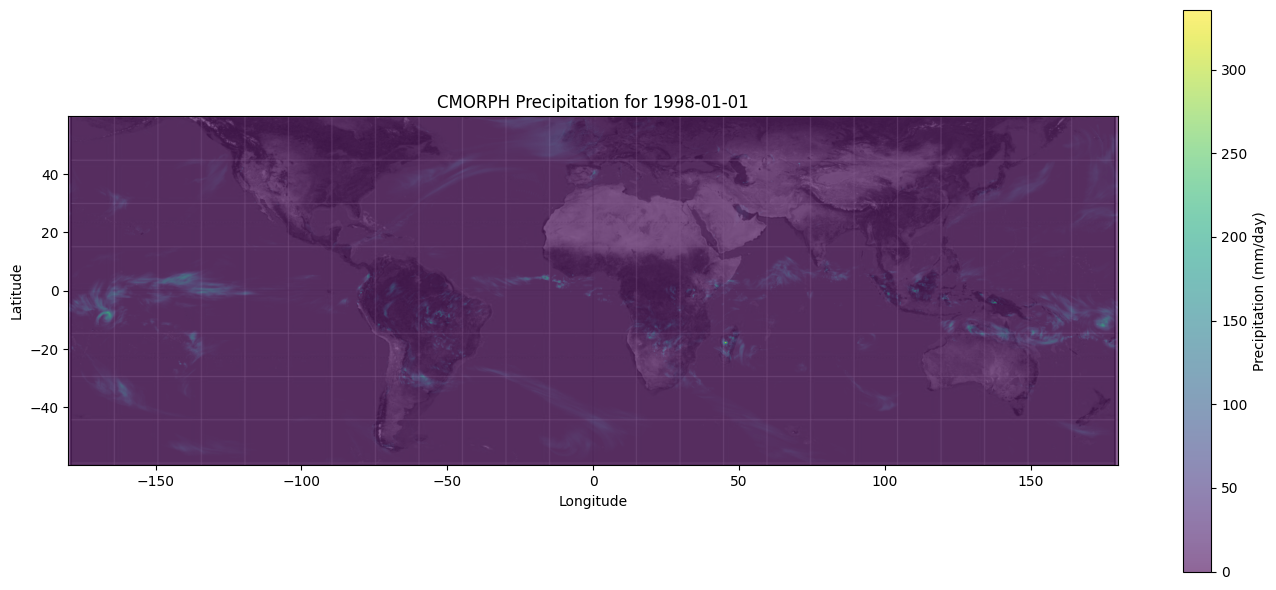

In [35]:
from netCDF4 import Dataset
import matplotlib.image as mpimg

# Quick script with an example of how to access data, and a little plot representing the earth and prec rates for a day :D
# Load one .nc file
path = "./data/cmorph/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_19980101.nc"
ds = Dataset(path)

# Extract lat, lon, and cmorph values
lat = ds.variables['lat'][:]
lon = ds.variables['lon'][:]
precip = ds.variables['cmorph'][0, :, :]  # shape: (480, 1440)

# Load background image
bg = mpimg.imread("./images/Equirectangular_projection_SW_BW.jpg")

# Fix longitudes to [-180, 180] and sort
lon = np.where(lon > 180, lon - 360, lon)
sorted_indices = np.argsort(lon)
lon = lon[sorted_indices]
precip = precip[:, sorted_indices]

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
ax.imshow(bg, extent=[-180, 180, -90, 90], aspect='auto')

# Trim lat/lon and sum_precip to match [-90, 90] x [-180, 180]
valid_lat_indices = (lat >= -90) & (lat <= 90)
lat = lat[valid_lat_indices]
precip[valid_lat_indices, :]


img = ax.imshow(precip, origin='lower',
                extent=[lon.min(), lon.max(), lat.min(), lat.max()],
                cmap='viridis', alpha=0.6)
plt.colorbar(img, ax=ax, label='Precipitation (mm/day)')
plt.title("CMORPH Precipitation for 1998-01-01")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()

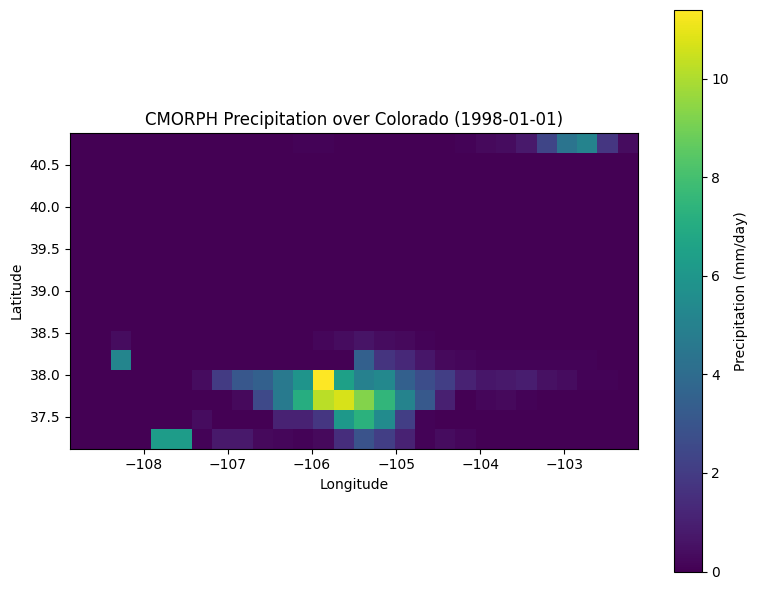

In [ ]:
# Same image, only looking at colorado and the monthly avg
# Load one .nc file
path = "./data/cmorph/CMORPH_V1.0_ADJ_0.25deg-DLY_00Z_19980101.nc"
ds = Dataset(path)

# Extract lat, lon, and cmorph values
lat = ds.variables['lat'][:]
lon = ds.variables['lon'][:]
precip = ds.variables['cmorph'][0, :, :]

# Convert longitudes
lon = np.where(lon < 0, lon + 360, lon)

# Colorado location
lat_min, lat_max = 37.0, 41.0
lon_min, lon_max = 250.95, 257.95

# Find lat/lon indices
lat_inds = np.where((lat >= lat_min) & (lat <= lat_max))[0]
lon_inds = np.where((lon >= lon_min) & (lon <= lon_max))[0]

# Subset the data
lat_crop = lat[lat_inds]
lon_crop = lon[lon_inds]
precip_crop = precip[np.ix_(lat_inds, lon_inds)]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(precip_crop, origin='lower',
                extent=[lon_crop.min()-360, lon_crop.max()-360, lat_crop.min(), lat_crop.max()],
                cmap='viridis')
plt.colorbar(img, ax=ax, label='Precipitation (mm/day)')
ax.set_title("CMORPH Precipitation over Colorado (1998-01-01)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()
